## **Sepsis Analysis: Building ML Model to Clasify The Sepsis Prevelence Level**

## Business Understanding 

#### Goal of the Project

The project aims to buld a machine learning modela that can classify the sepsis illness in the community

#### Hypothesis 

1. Null Hypothesis (H0): There is no difference in the likelihood of developing sepsis between older and younger patients.

2. Alternative Hypothesis (H1): Older patients are more likely to develop sepsis compared to younger patients.

#### Analytical Question

1. What is the correlation between age and insurance?

2. What is the relationship between sepsis and age of the patients ?

3. Does high body mass index lead to high prevelence of sepsis?

4.What is the number of patients with high PRG and their Sepssis statuts?





#### Features 

ID: number to represent patient ID

PRG: Plasma glucose

PL: Blood Work Result-1 (mu U/ml)

PR: Blood Pressure (mm Hg)

SK: Blood Work Result-2 (mm)

TS: Blood Work Result-3 (mu U/ml)

M11: Body mass index (weight in kg/(height in m)^2

BD2: Blood Work Result-4 (mu U/ml)

Age: patients age (years)

Insurance: If a patient holds a valid insurance card

Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

#### Importing Packages

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from scipy.stats import chi2_contingency

#### Loading The Datasets

In [146]:
##Loading train dataset

Train = pd.read_csv("C:\\Users\\Admin\\OneDrive - Azubi Africa\\PROJECTS\\Machine-Learning-API\\Dataset\\Paitients_Files_Test.csv")


In [147]:
Train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [148]:
##Loading the test dataset

Test = pd.read_csv("C:\\Users\\Admin\\OneDrive - Azubi Africa\\PROJECTS\Machine-Learning-API\\Dataset\\Paitients_Files_Train.csv")

In [149]:
Test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [150]:
type(Test)

pandas.core.frame.DataFrame

##### Concatinating the datasets

In [151]:
Concat = pd.concat([Train,Test])

In [152]:
Concat.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,NaN
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,NaN
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,NaN
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,NaN
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,NaN


### Exploratory Data Analysis (EDA)

In [153]:
Concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         768 non-null    object 
 1   PRG        768 non-null    int64  
 2   PL         768 non-null    int64  
 3   PR         768 non-null    int64  
 4   SK         768 non-null    int64  
 5   TS         768 non-null    int64  
 6   M11        768 non-null    float64
 7   BD2        768 non-null    float64
 8   Age        768 non-null    int64  
 9   Insurance  768 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 72.0+ KB


In [154]:
Concat.isnull

<bound method DataFrame.isnull of             ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    ICU200609    1  109  38  18  120  23.1  0.407   26          1       NaN
1    ICU200610    1  108  88  19    0  27.1  0.400   24          1       NaN
2    ICU200611    6   96   0   0    0  23.7  0.190   28          1       NaN
3    ICU200612    1  124  74  36    0  27.8  0.100   30          1       NaN
4    ICU200613    7  150  78  29  126  35.2  0.692   54          0       NaN
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

[768 rows x 11 columns]>

In [155]:
Concat.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
PL,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
PR,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SK,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
TS,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
M11,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
BD2,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Insurance,768.0,0.695312,0.460575,0.000,0.00000,1.0000,1.00000,1.00


In [156]:
Concat.describe(include='object').T

,count,unique,top,freq
ID,768,768,ICU200609,1
Sepssis,599,2,Negative,391


In [157]:
Concat.duplicated().sum()

0

#### Univariate Analysis

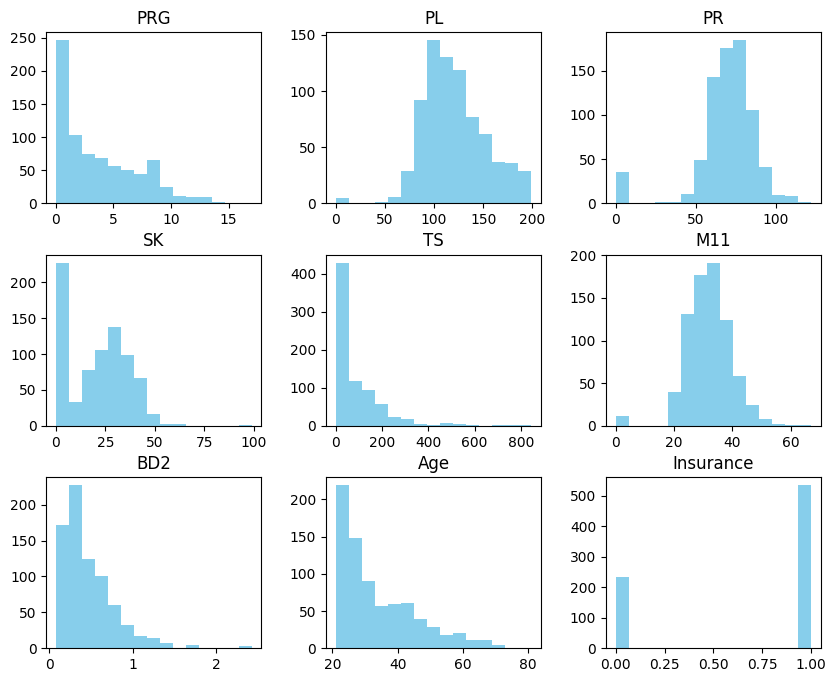

In [158]:
Concat. hist(figsize=(10,8), color = "skyblue", grid=False, bins= 15)
plt.show()

In [159]:
Concat.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_17380\379252292.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


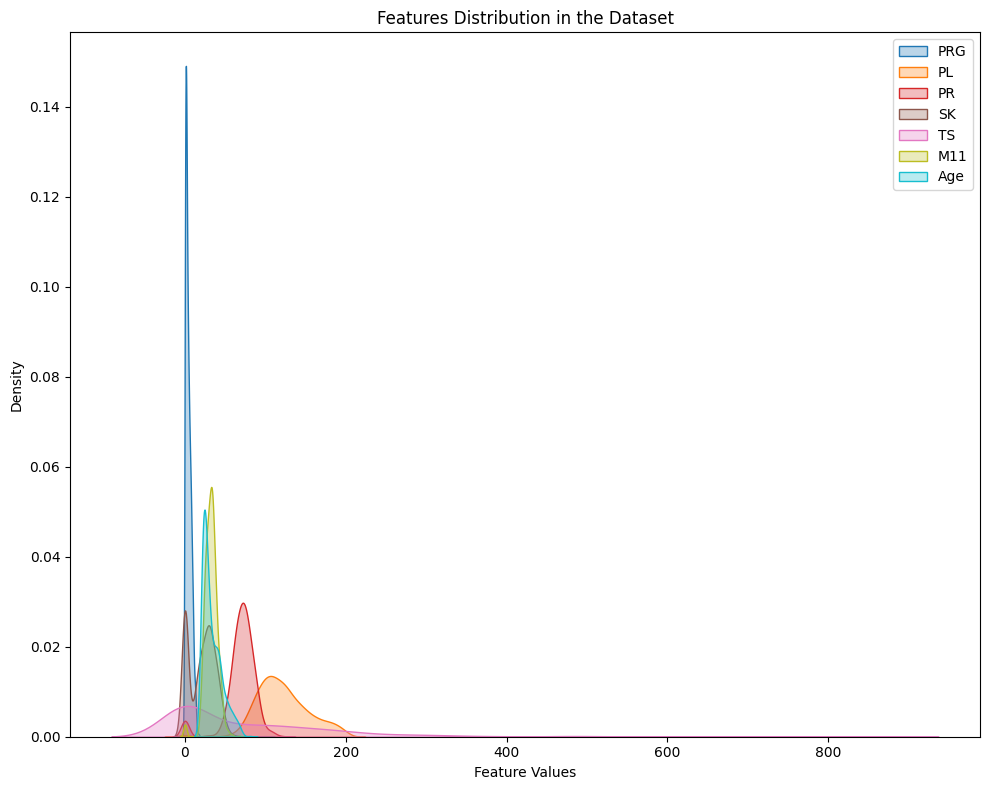

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Assuming 'Concat' is your DataFrame
cols_to_plot = Concat.drop(columns=['ID','Insurance','Sepssis','BD2'])

plt.figure(figsize=(10, 8))

# Create colormap for assigning different colors
cmap = plt.cm.get_cmap('tab10')
num_colors = len(cols_to_plot.columns)

# Loop through each column to plot KDE plot
for i, col in enumerate(cols_to_plot.columns):
    color = cmap(i / (num_colors - 1))
    sns.kdeplot(Concat[col], fill=True, color=color, alpha=0.3, label=col)

# Adjust plot elements
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.title('Features Distribution in the Dataset')
plt.legend()
plt.tight_layout()
plt.show()


<Axes: xlabel='value', ylabel='count'>

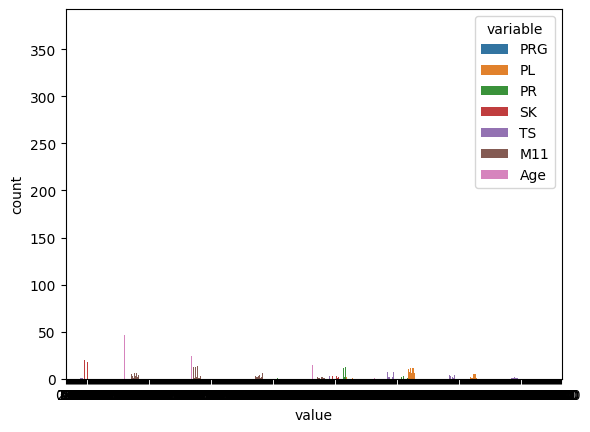

In [161]:
sns.countplot(data=Concat.drop(['ID','Insurance','Sepssis','BD2'], axis=1).melt(), x='value', hue='variable')


#### Chicking for outliers

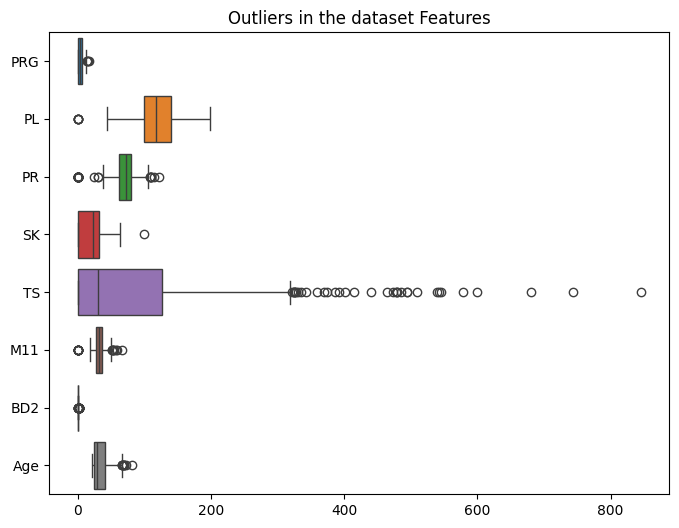

In [162]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=Concat.drop(['ID', 'Insurance', 'Sepssis'], axis=1), orient='h')
plt.title('Outliers in the dataset Features')
plt.show()


#### Bi-viriate Analysis

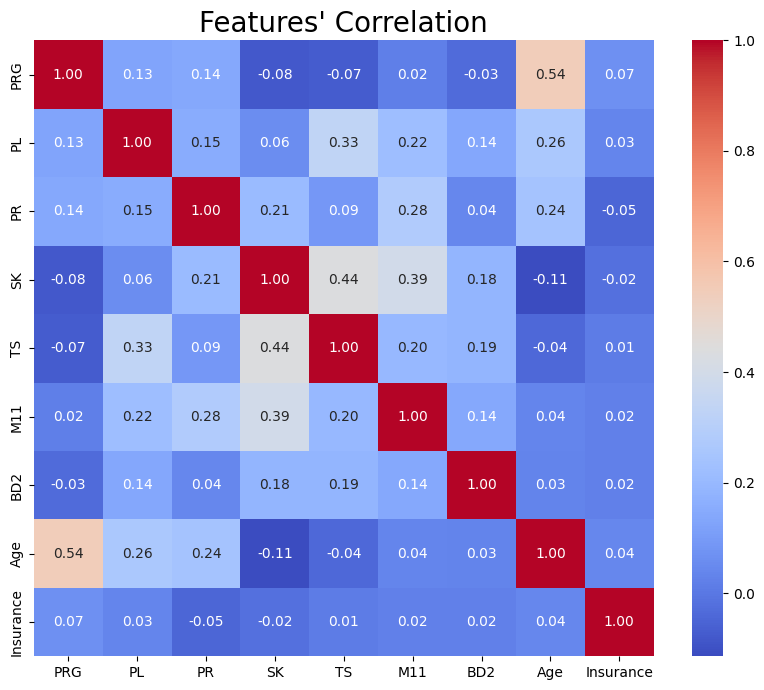

In [163]:
# Drop non-numeric columns
numeric_features = Concat.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr = numeric_features.corr()

# Visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Features' Correlation", fontsize=20)
plt.show()


There is a very weak correlation between the variables in this dataset. However,
Age has a slightly strong correlation with insurance and PRG (Plasma glucouse)

<Figure size 1200x800 with 0 Axes>

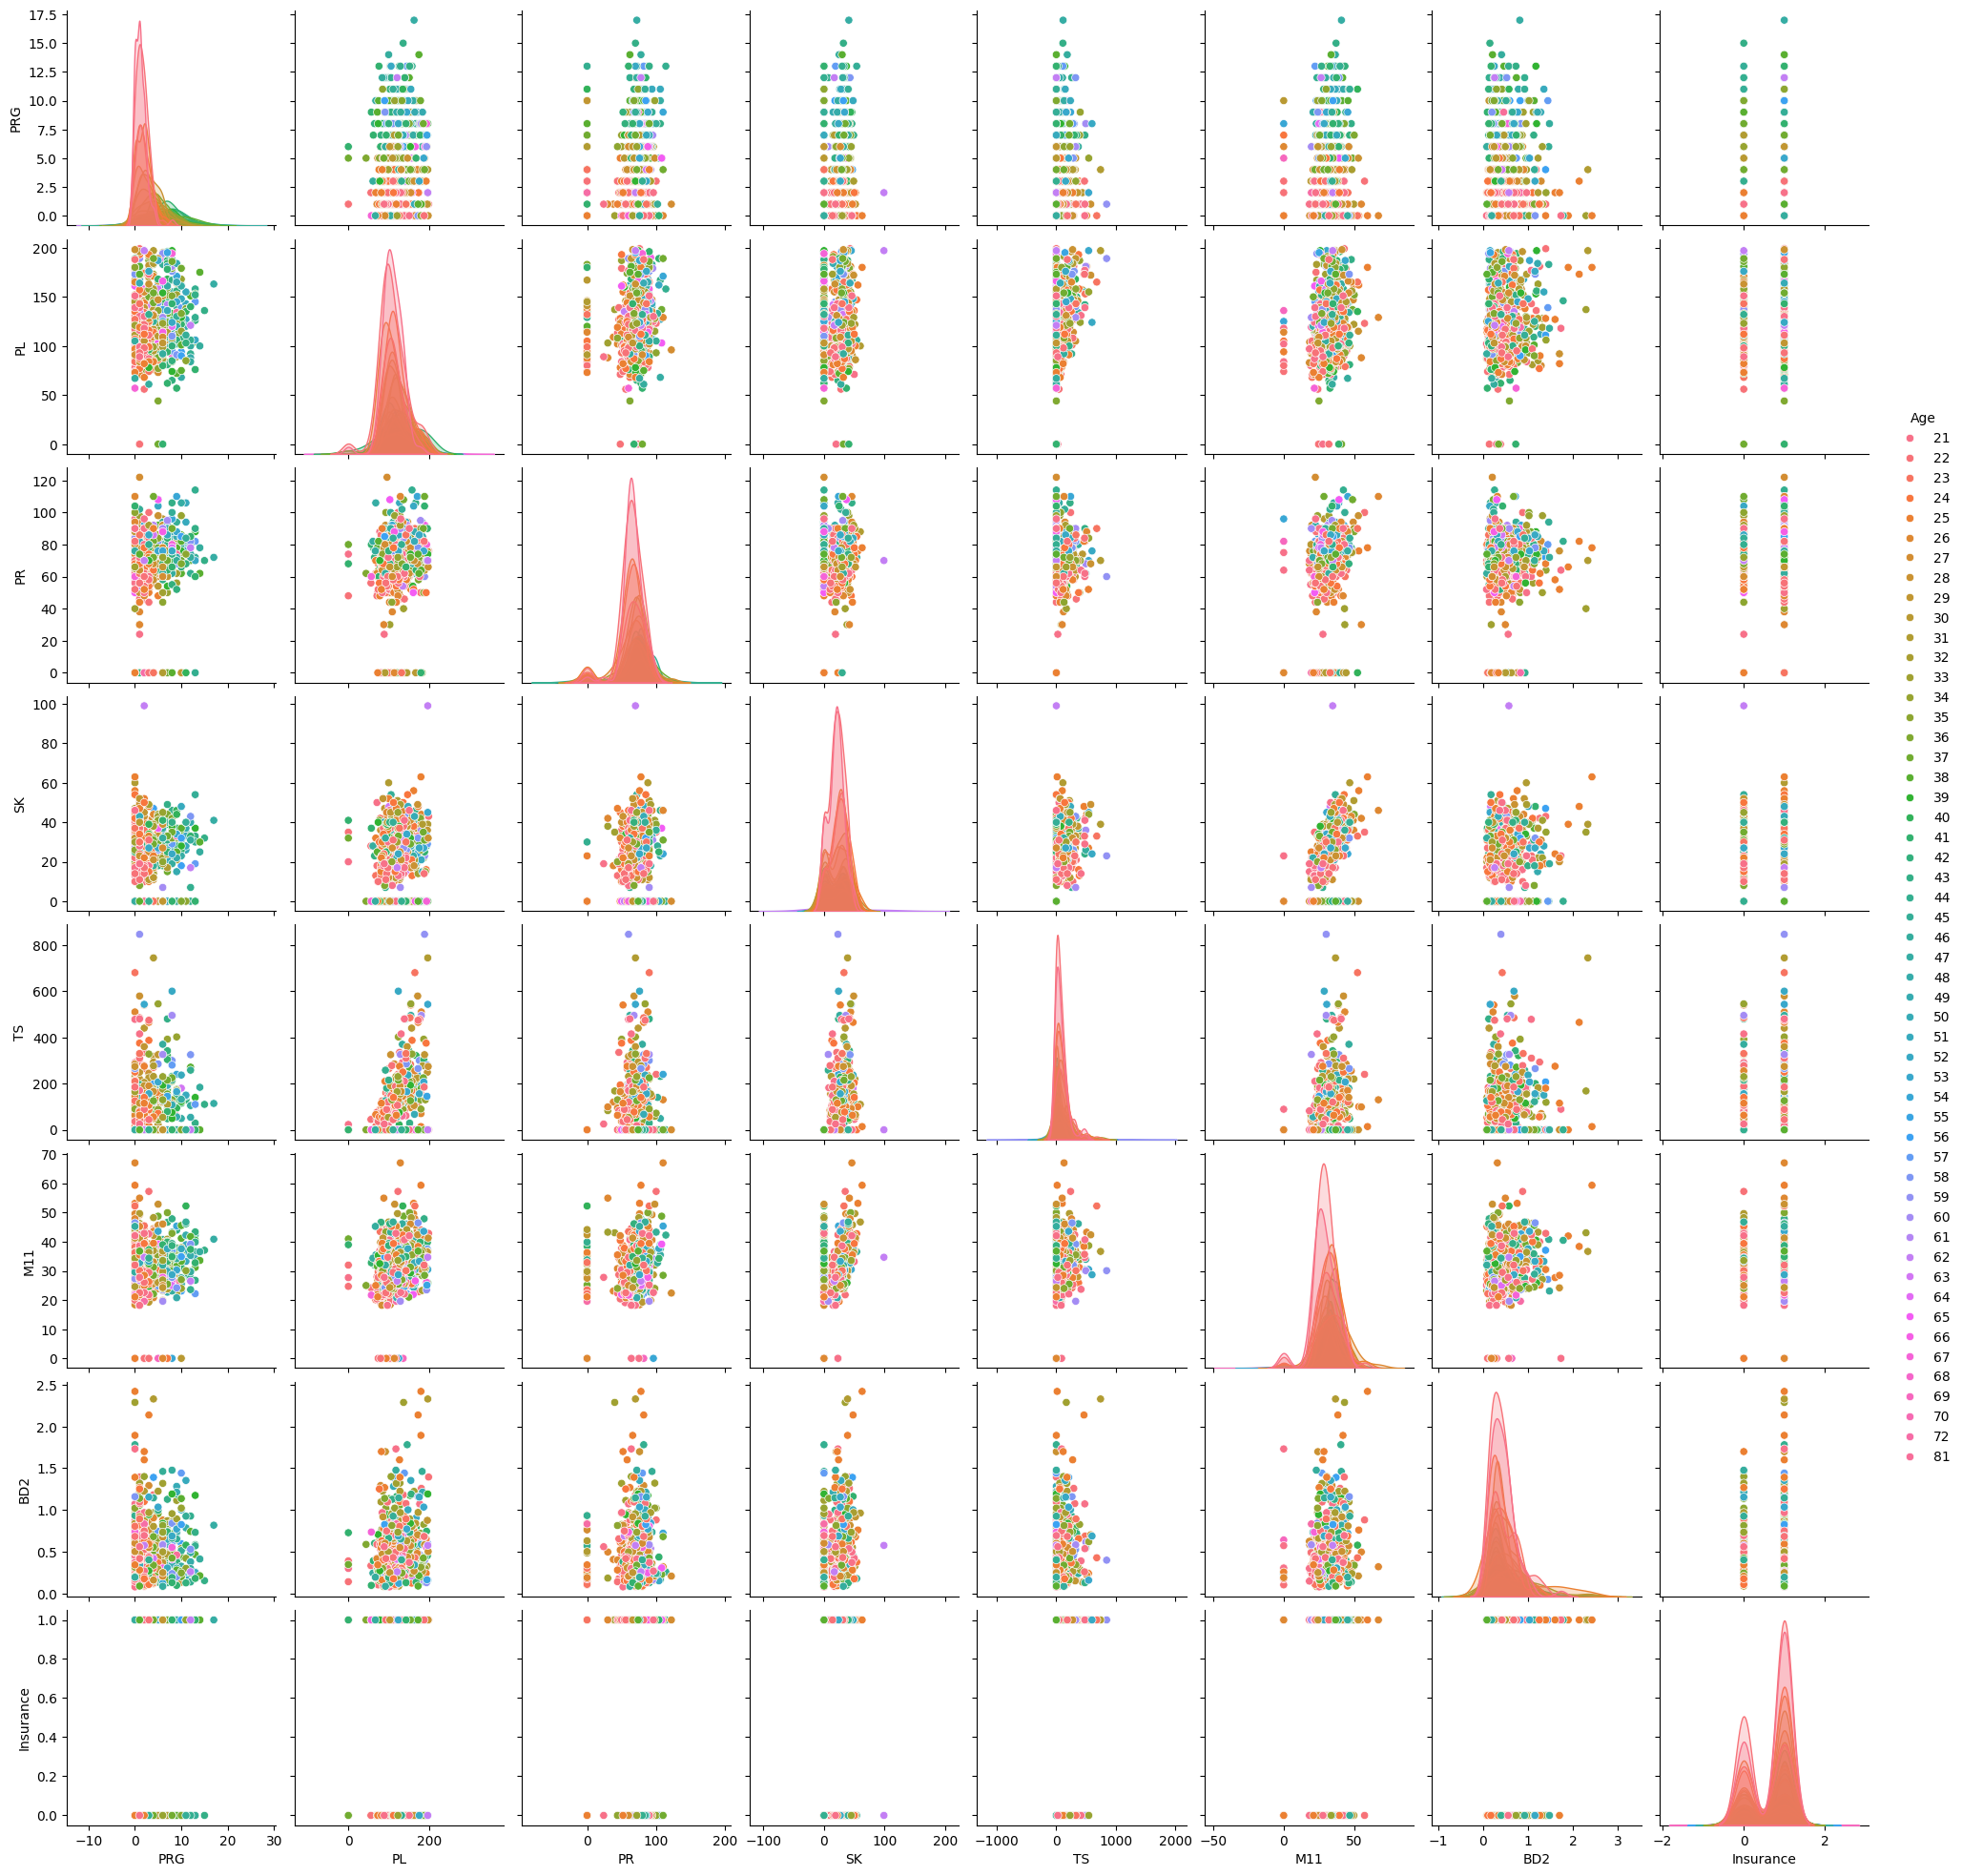

In [164]:
# Testing sepsis prevalence against age
sepsis_prevalence = Concat[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance', 'Sepssis']]

# Define a color palette for different age groups
age_palette = sns.color_palette("husl", len(sepsis_prevalence['Age'].unique()))

# Create pairplot with different color shades for different ages
plt.figure(figsize=(12, 8))
sns.pairplot(sepsis_prevalence, hue='Age', palette=age_palette)
plt.show()


#### Multi-variate Analysis

In [165]:
# Load the original datasets 
x = Test
y = Train

#Performing a Principal Component Analysis (PCA)
pca = PCA(n_components=3)
pca_test = pca.fit_transform(x)

NameError: name 'PCA' is not defined

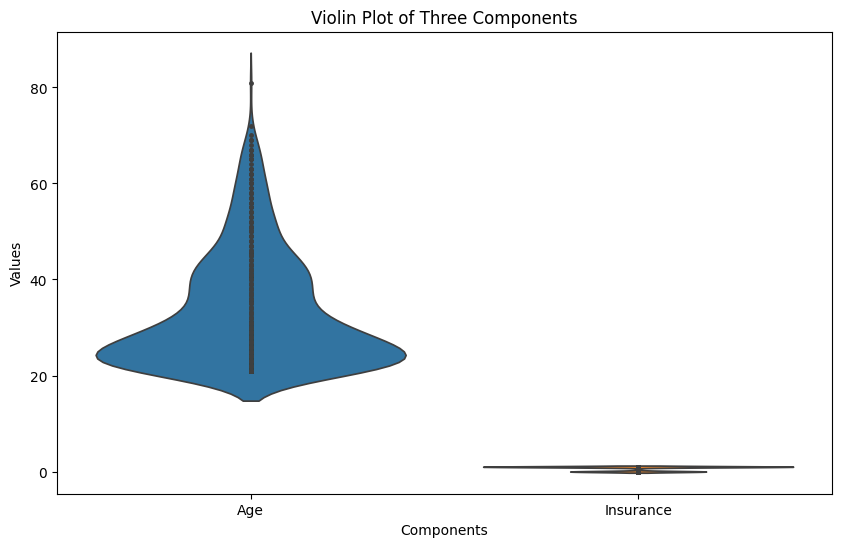

In [166]:
# Select three components for the violin plot
component1 = 'Age'
component2 = 'Sepssis'
component3 = 'Insurance'

# Prepare the data for the violin plot
selected_data = Concat[[component1, component2, component3]]

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=selected_data, inner="points")  # inner="points" to show individual data points inside the violins
plt.title('Violin Plot of Three Components')
plt.xlabel('Components')
plt.ylabel('Values')
plt.show()


#### Answering the Analytical Questions 

Question 1.

 What is the correlation between age and insurance?

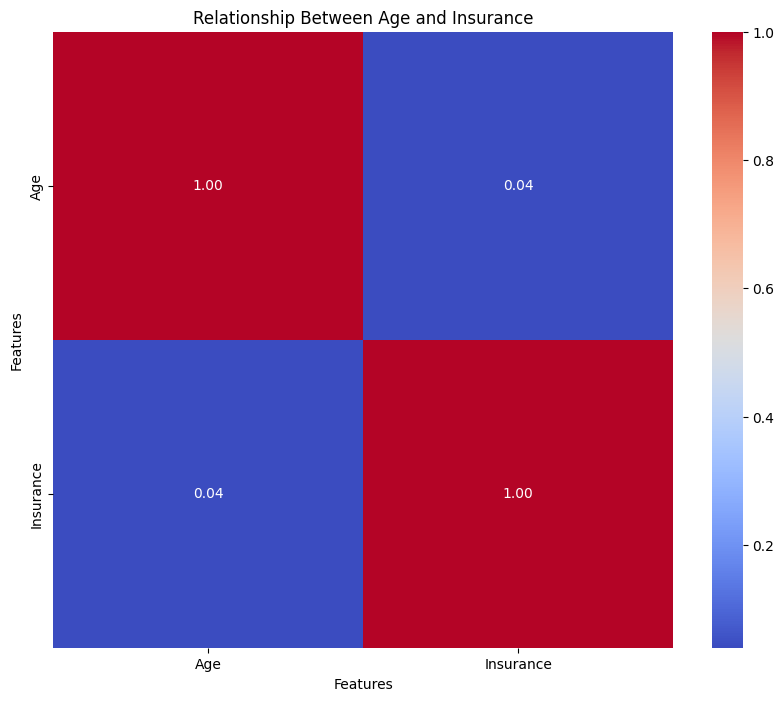

In [167]:
# Calculate the correlation between Age and Insurance columns
age_insurance_corr = Concat[['Age', 'Insurance']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(age_insurance_corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Relationship Between Age and Insurance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


Question 2.

What is the relationship between sepsis and age of the patients ?

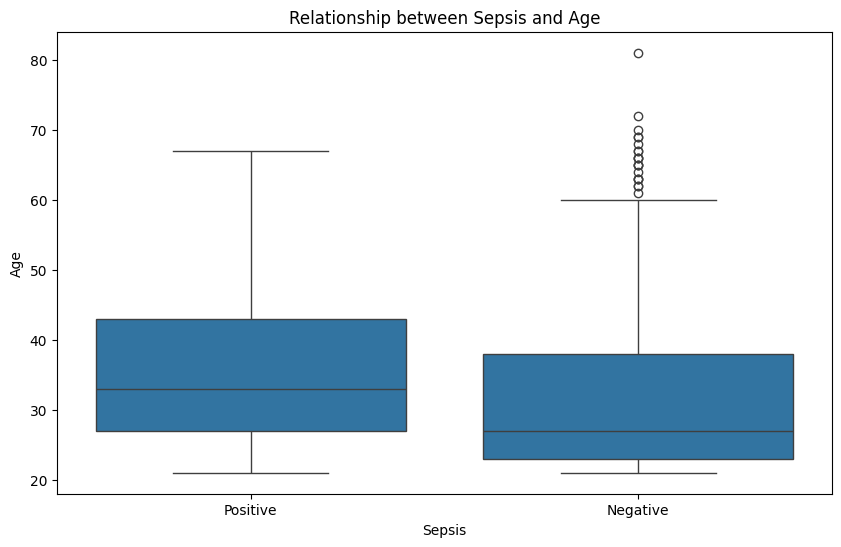

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=Concat, x='Sepssis', y='Age')

# Add labels and title
plt.xlabel('Sepsis')
plt.ylabel('Age')
plt.title('Relationship between Sepsis and Age')

# Show plot
plt.show()


Question 3.

Does high body mass index lead to high prevelence of sepsis?



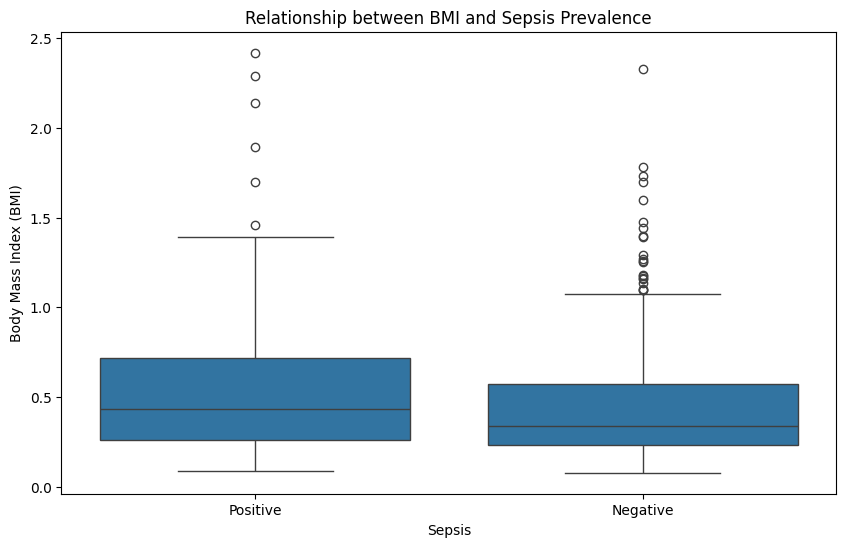

In [169]:

# Create box plot plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=Concat, x='Sepssis', y='BD2') 
plt.xlabel('Sepsis')
plt.ylabel('Body Mass Index (BMI)')
plt.title('Relationship between BMI and Sepsis Prevalence')
plt.show()


Question 4 

What is the number of patients with high PRG and their Sepssis statuts

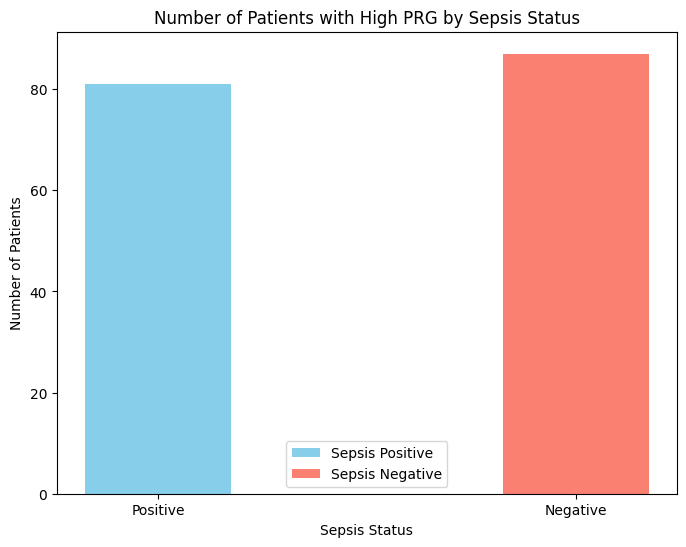

In [180]:

# Define the threshold value for PRG
threshold_value = 5

# Filter the DataFrame for patients who are Sepsis positive and negative with high PRG
sepsis_positive_high_prg = Concat[(Concat['Sepssis'] == 'Positive') & (Concat['PRG'] > threshold_value)]
sepsis_negative_high_prg = Concat[(Concat['Sepssis'] == 'Negative') & (Concat['PRG'] > threshold_value)]

# Count the number of patients
num_sepsis_positive = len(sepsis_positive_high_prg)
num_sepsis_negative = len(sepsis_negative_high_prg)

# Plot the graph
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = [1, 2]
plt.bar(index, [num_sepsis_positive, num_sepsis_negative], bar_width, color=['skyblue', 'salmon'], label=['Sepsis Positive', 'Sepsis Negative'])
plt.xlabel('Sepsis Status')
plt.ylabel('Number of Patients')
plt.title('Number of Patients with High PRG by Sepsis Status')
plt.xticks(index, ['Positive', 'Negative'])
plt.legend()
plt.show()


#### Hypothesis Testing 

Null Hypothesis (H0): There is no difference in the likelihood of developing sepsis between older and younger patients.

In [186]:

# 'Age' is categorized into 'Older' and 'Younger' based on a threshold
# 'Sepsis' indicates whether the patient developed sepsis ('Positive' or 'Negative')

# Create a contingency table
contingency_table = pd.crosstab(Concat['Age'], Concat['Sepssis'])

# Perform chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Define the significance level
alpha = 0.05

# Compare the p-value to the significance level
if p < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant association between age group and sepsis occurrence.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant association between age group and sepsis occurrence.")

# Output results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)



Reject the null hypothesis.
There is a significant association between age group and sepsis occurrence.
Chi-square statistic: 120.0398504698636
P-value: 6.792759690579366e-08
Degrees of freedom: 49
Expected frequencies table:


##### The p-value turned to be greated than the alpha value hence the null hypothesis is rejected. There is clearly a reletionship between age and sepssis.